<h2>Group 25 (Classification Project1)</h2>

<h4>Importing Modules that are needed for this project</h4>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.decomposition import PCA
import time

<h4>Loading mnist data set by using tensor flow</h4>

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

<h4>Reshaping x_train and y_train and then selecting random samples from the training data that can be used from the second question we used 960 samples from the training data set to do the leave one out cross validation from question 2</h4>

In [7]:
nsamples, nx, ny = x_train.shape
Xtrain = x_train.reshape((nsamples,nx*ny))#It is converting our 28*28 pixel(2D Array) into 784(1d) array for X_train
nsamples1, nx1, ny1 = x_test.shape
Xtest= x_test.reshape((nsamples1,nx1*ny1))#It is converting our 28*28 pixel(2D Array) into 784(1d) array for X_test
ren=Xtrain
dfre=pd.DataFrame(ren)
dfre['op']=y_train
dfren=dfre.sample(frac=0.016, replace=True, random_state=1)# Selecting random Samples from the data set 
dfren
yentrain=dfren['op'].to_numpy()
dfren.drop(['op'], axis=1,inplace=True)
Xtrainf=dfren.to_numpy()
#print(Xtrainf.shape)

<h2>Question 1</h2>

For this question we have used the k value of 1 and presented the Testing error percentage for each and every digit (0-9) in the mnist data set

In [10]:
def Knn(k,x_train,y_train,x_test,y_test):# This function retuns the predicted(y) and accuracy of the model in predicting the test data
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    accuracy = model.score(x_test, y_test)#Calculates the accuracy of our model on testing data
    #print("For {0} nearest neighbours we got the accuracy of {1}".format(k,accuracy * 100))
    return pred,accuracy

In [11]:
def TestErrorDigits(pred,y_test):#This Function Will return a data frame containing testing error for each and every digit
    rray=[0,0,0,0,0,0,0,0,0,0]
    for i in range(len(y_test)):
        if(pred[i]!=y_test[i]):#checking whether our predicted output and given label are same or not
            rray[y_test[i]]=rray[y_test[i]]+1
    err=[]
    (unique, counts) = np.unique(y_test, return_counts=True)#This will give us the output how many times digits are present in the ytest 
    #print(len(rray))
    for i in range(len(rray)):
        err.append((rray[i]/counts[i])*100)
    d={'Digits':[0,1,2,3,4,5,6,7,8,9],'Testing Error':err}
    df=pd.DataFrame(d)
    return df    

In [18]:
(x,y)=Knn(1,Xtrain,y_train,Xtest,y_test)#k=1
table=TestErrorDigits(x,y_test)
table

,Digits,Testing Error
0,0,0.714286
1,1,0.528634
2,2,3.875969
3,3,3.960396
4,4,3.869654
5,5,3.587444
6,6,1.461378
7,7,3.501946
8,8,5.544148
9,9,4.162537


<h2>Question 2</h2>

In this question we have implemented leaveone out approach for k values 1 to 21 then took the best value of k and trained our model and predicted the values for Xtest. Then we compared the value of Ytest and predictedY and presend a table for the testing error for each digit.We also ploted the leaveoneout error vs k plot.

In [12]:
def Knn1(k,x_train,y_train,x_test,y_test):# This function will return the predicted y values by using KNN classifier
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    return pred

In [13]:
def leaveoneout(Xtrain,y_train):# This function will perform leave one out method and returns the best k value and leaveone out error 
    tert=Xtrain
    nikhil=[]
    terty=y_train
    error=[0] *20 #since we are considering from k=1 to 21, we initialied an empty array of size 20 
    for k in range(1,21):
        for i in range(len(tert)):
            # Delete column at index 1
            tex=tert[i]#This will get us the sample on which we need to perform the test after training our model
            #print(tex.shape)
            tey=terty[i]
            xt = np.delete(tert, i, axis=0)#Deleting our sample from our data that is passed to train.
            yt = np.delete(terty, i, axis=0)#Deleting our sample from our label that is passed to train
            tex=tex.reshape(1, -1)
            #print(tex.shape)
            (nik)=Knn1(k,xt,yt,tex,tey)
            if(nik[0]!=tey):
                #print("{0},{1}".format(nik[0],tey))
                error[k-1]=error[k-1]+1
            nikhil.append(nik)
    preck=error.index(min(error))
    #print(preck)
    print("Best k value is {0}".format(preck+1)) 
    return (preck+1),error

In [12]:
start_time = time.process_time()
(b,acc)=leaveoneout(Xtrainf,yentrain)#here b willcontain  the best value of k and acc will contain the leave one out error
(xe2,ye2)=Knn(b,Xtrain,y_train,Xtest,y_test)
table=TestErrorDigits(xe2,y_test)
print("execution time is",time.process_time() - start_time, "seconds")
table

Best k value is 5
execution time is 2288.078125 seconds


,Digits,Testing Error
0,0,0.612245
1,1,0.176211
2,2,3.972868
3,3,3.366337
4,4,3.869654
5,5,3.363229
6,6,1.356994
7,7,3.891051
8,8,6.262834
9,9,4.658077


<h5>K Vs Leaveone out error</h5>

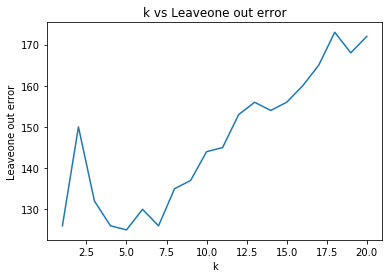

In [13]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x,acc)
ly=max(acc)
#plt.axis([0, 21, 0, 140])
plt.xlabel('k')
plt.ylabel('Leaveone out error')
plt.title('k vs Leaveone out error')
plt.show()

From the above graph we can say that k=5 have the least leaveoneout error 

<h2>Question 3</h2>

In this question we implemented the downsamper on the data set by using a downsampler scaler of 2,4,7 and 14.

In [37]:
def downsap(Xtrain,Xtest,i):# this function will return the downsampled numpy arrays for both test and training data set
    dr=pd.DataFrame(Xtrain)#converts our xtrain numpy array into a data frame
    dr1=dr[dr.columns[::i]]# It will pick every i th column in the data frame and stores it in a new data frame
    Xtrain1=dr1.to_numpy()
    dr2=pd.DataFrame(Xtest)#converts our xtrain numpy array into a data frame
    dr3=dr2[dr2.columns[::i]]# It will pick every i th column in the data frame and stores it in a new data frame
    Xtest1=dr3.to_numpy()
    return Xtrain1,Xtest1
    

In [38]:
start_time = time.process_time()
e = [[0 for i in range(5)] for j in range(20)] #empty matrix
n=[2,4,7,14]#scaling values for down sampling
err2=[]
for i in n:
    p=n.index(i)
    (t,r)=downsap(Xtrainf,Xtest,i)
    print("for n={0}".format(i))
    print("-------------------")
    (b1,acc1)=leaveoneout(t,yentrain)
    (x2,y2)=Knn(b1,t,yentrain,r,y_test)
    print("Accuracy: {0}".format(y2))
    print("-----------------") 
#print(e)
print("execution time is",time.process_time() - start_time, "seconds")

for n=2
-------------------
Best k value is 3
Accuracy: 0.8776
-----------------
for n=4
-------------------
Best k value is 1
Accuracy: 0.8073
-----------------
for n=7
-------------------
Best k value is 1
Accuracy: 0.6975
-----------------
for n=14
-------------------
Best k value is 9
Accuracy: 0.6258
-----------------
execution time is 381.421875 seconds


<h5>As we can see from the results that as the n values(i.e downsampling rate) increases the accuracy of the model is getting decreased.Execution time is 381.421875 seconds</h5>

<h2>Question 4</h2>

In this question we implemented the smart sampler on the data set by using a smart sampler scaler of 2,4,7 and 14. we have considered the 784(1d) pixels and added avery n(depends on the n value) elements and stored it in a list.Then we splitted the list into  N chuncks of size 28. Then added every nth element in the list.(i.e each list will make a row in our final (28/n)X(28/n) matrix. 

In [41]:
def smartsample(n,Xtrain):#This function will return an numpy array after smart down sampling it
    p=Xtrain
    finaes=[]
    ycol=int(28/n)#we will get the number of columns in our final smart sample matrix from here
    #print(p.shape)
    it=p.shape
    m=it[1]/n
    #print(int(m))
    e1 = [[0 for i in range(ycol*ycol)] for j in range(it[0])]
    #print(it[0])
    for i in range(it[0]):
        jun=[]
        fin=[]
        resur=[]
        rest=np.add.reduceat(p[i], np.arange(0, len(p[i]), n))#This will add the every n elements in 784 pixels and give us the output list of length (784/n)
        jun=rest.tolist()  
        n1=28# initial dimention of our matrix 
        #print(len(jun))
        for i in range(0, len(jun), n1):# we are making sublists of our (784/n) list each containing 28 elements
            #print(i)
            fin.append(jun[i:i+n1])
        for i in range(len(fin)):#now we are adding every nth element in our sublists so now each list will contribute to a column
            for j in range(ycol):
                resur.append(sum(fin[i][j::ycol]))
        #print((resur)) 
        finaes.append(resur)# list containing smart sample image pixes for our data
        #print(type(e1[i]))
    #print(finaes)
    a = np.array(finaes)
    #print(a)
    return a# A numpy array containing all the reduced samples of dataset 

In [42]:
n=[2,4,7,14]#list containing smart down sampler numbers
start_time = time.process_time()
for i in n:
    i0=smartsample(i,Xtrainf)# it will give us the smart sampled raining error
    i12=smartsample(i,Xtest)
    print("for n={0}".format(i))
    print("------------------")
    (b1,acc1)=leaveoneout(i0,yentrain)
    (x2,y2)=Knn(b1,i0,yentrain,i12,y_test)
    print("Accuracy: {0}".format(y2))
    print("-----------------")   
print("execution time is",time.process_time() - start_time, "seconds")

for n=2
------------------
Best k value is 3
Accuracy: 0.8964
-----------------
for n=4
------------------
Best k value is 1
Accuracy: 0.8688
-----------------
for n=7
------------------
Best k value is 5
Accuracy: 0.7219
-----------------
for n=14
------------------
Best k value is 8
Accuracy: 0.4224
-----------------
execution time is 164.140625 seconds


<h5>As we can see from the results that as we increase the n value(i.e smartsampling rate) the accuracy of the model is getting decreased.Execution time is 164.140625 seconds</h5>

<h5> Image after using smart sampler</h5>

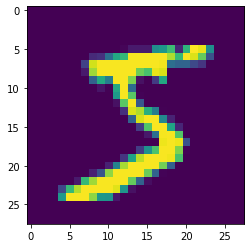

In [32]:
rty=pd.DataFrame(Xtrain)
r3=rty.loc[0,:]
plottable_image = np.reshape(r3.values, (28, 28))
plt.imshow(plottable_image)

<h5> Image after using smart sampler(n=14)</h5>

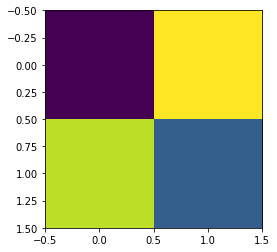

In [44]:
rty=pd.DataFrame(i0)
r3=rty.loc[0,:]
plottable_image = np.reshape(r3.values, (2, 2))
plt.imshow(plottable_image)

<h5>As we can see from the results that as we increase the n value(i.e downsampling rate) the accuracy of the model is getting decreased.And we can see that execution time is 165.640625 seconds</h5>

<h2>Question5</h2>

In this question we have implemented smart sampler by taking the n values as 28 so our image matrix will be reduced to 1X1. Due to the time complexity we have taken only 1000 samples from the training data set to perform this task

In [53]:
start_time = time.process_time()
i1=smartsample(28,Xtrainf)# for n=28
i13=smartsample(28,Xtest)
(b2,acc2)=leaveoneout(i1,yentrain)
(x2,y2)=Knn(b2,i1,yentrain,i13,y_test)
print("Accuracy: {0}".format(y2))
print("execution time is",time.process_time() - start_time, "seconds")

Best k value is 19
Accuracy: 0.2008
execution time is 16.609375 seconds


<h5>As we can see from the results that accuracy is 0.2. Accuracy is low because we are down scaling the whole image into (1X1) so it will a single pixel(sum of all). So when we train the model with this single pixel it will be very difficult for the model to predict the output. And we can see that execution time is 16.609375 seconds</h5>

<h5> Image before using smart sampler(n=28)</h5>

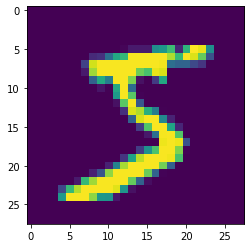

In [47]:
rty1=pd.DataFrame(Xtrain)
r3=rty1.loc[0,:]
plottable_image = np.reshape(r3.values, (28, 28))
plt.imshow(plottable_image)

<h5> Image after using smart sampler(n=28)</h5>

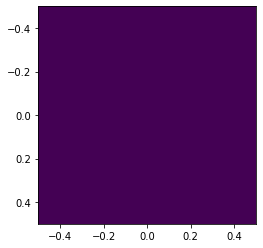

In [54]:
import matplotlib.pyplot as plt
rty=pd.DataFrame(i1)
r3=rty.loc[0,:]
plottable_image = np.reshape(r3.values, (1, 1))
plt.imshow(plottable_image)

In [58]:
print("Total number of pixels for number 8:{0}".format(i1[21]))
print("Total number of pixels for number 1:{0}".format(i1[27]))

Total number of pixels for number 8:[35241]
Total number of pixels for number 1:[11900]


From the above total number of pixels(1X1) for each and every image we can say that digit '8' have more dark pixels than digit '1'

<h2>Question6</h2>

PCA is unsupervised nonparametric statistical technique primarily used for dimensionality reduction in Machine Learning. It is widely use across different fields prominently for feature extraction. The primary problem associated with high dimensionality is model overfitting which reduces the ability to generalise beyond the examples in the training set. Many algorithms that work fine in lower dimensions become hard to control the high dimensions input. PCA can be used to filter the noise datasets such as image compression.

Complete steps for PCA:

1)	The first step is to find the mean of each column in the complete data set.
     Mean is ratio of sum of all values in the column to number of variables in the column.
     
2)	Then need to centre the values in each column by subtracting the values from the mean.
     Each variable in X - mean(X)
3)	A covariance matrix is a calculation of covariance of a given matrix with covariance scores for every column with every other column, including itself.

     Covariance: Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together. 


In [15]:
%%html
<img src = "asd.png",width=20,height=10> 


4)	Then calculate the eigen decomposition of the covariance matrix. (Eigen values represent the magnitudes for the direction).
5)	The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace for the data frame.

The eigenvalues of A are roots of the characteristic equation
  det(A-λI) = 0 where I is the identity matrix.
        
        The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.
        
6)	The chosen data can be projected into the subspace via matrix multiplication. 

In [16]:
fre=pd.DataFrame(Xtrain)
fre1=pd.DataFrame(Xtest)
fre2=pd.concat([fre, fre1])
#fre2 = fre2.reindex(index=[i for i in range(fre2.shape[0])])
fre2.reset_index()
xpc=fre2.to_numpy()
xpc=(xpc-xpc.mean())/xpc.std() #standardisation 

In [20]:
start_time = time.process_time()
accpca=[2,10,25,50,100,196]
accpc=[]
for j in accpca:
    pca = PCA(n_components=j)
    principalComponents = pca.fit_transform(xpc)
    principalDf = pd.DataFrame(data = principalComponents)
    rens=principalDf[:60000]
    rens['op']=y_train.tolist()
    dfrens1=rens.sample(frac=0.0167, replace=True, random_state=1)# Selecting random Samples from the data set 
    ytre=dfrens1['op'].to_numpy()
    dfrens1.drop(['op'], axis=1,inplace=True)
    rens=dfrens1.to_numpy()#Train data samples
    print("for number of components:{0}".format(j))
    print("-----------------")   
    rens1=principalDf[60000:]#test data samples
    (ke1,ke2)=leaveoneout(rens,ytre)# performing leaveoneout method to get the best value of k
    (x2,y2)=Knn(ke1,rens,ytre,rens1,y_test)#By using the best value of k we are predicting the accuracy by using knn classifier
    print("Accuracy: {0}".format(y2))
    print("-----------------")   
    accpc.append(y2)
print("execution time is",time.process_time() - start_time, "seconds")    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


for number of components:2
-----------------
Best k value is 8
Accuracy: 0.4277
-----------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


for number of components:10
-----------------
Best k value is 6
Accuracy: 0.8483
-----------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


for number of components:25
-----------------
Best k value is 7
Accuracy: 0.9033
-----------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


for number of components:50
-----------------
Best k value is 4
Accuracy: 0.9019
-----------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


for number of components:100
-----------------
Best k value is 7
Accuracy: 0.8908
-----------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


for number of components:196
-----------------
Best k value is 7
Accuracy: 0.8851
-----------------
execution time is 421.421875 seconds


<h5>From the above results we can say that for the number of components=25 we got the highest accuracy for the model and the execution time is 421.421875 seconds</h5>

<h5>Amount of variance plot</h5>

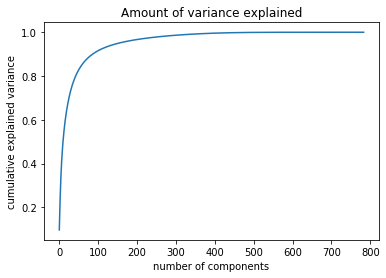

In [18]:
pca = PCA().fit(xpc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Amount of variance explained')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We can observe from the above graph that the amount of variance of 80% can be seen for around 60 number of components.
We can observe from the above graph that the amount of variance of 90% can be seen for around 100 number of components.
Whereas we can observe from the abovegraph that the amount of variance of 100% can be seen for around 375 number of components.

<h5>Accuracy vs Number of components plot</h5>

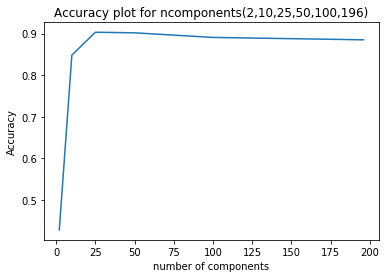

In [45]:
plt.plot(accpca,accpc)
plt.title('Accuracy plot for ncomponents(2,10,25,50,100,196)')
plt.xlabel('number of components')
plt.ylabel('Accuracy');

In the above problem we have considered number of components in the PCA as 2,10,25,50,100,196. We have got the accuracies of model when number of components are 2,10,25,50,100,196. We can observe from the above figure we cann say that the accuracy when number of components =25 is around 90%.